![](https://wordstream-files-prod.s3.amazonaws.com/s3fs-public/styles/simple_image/public/images/machine-learning1.png?SnePeroHk5B9yZaLY7peFkULrfW8Gtaf&itok=yjEJbEKD)

# Introduction

Firstly i would like to clear that, I will not do much EDA because my main focus will be covering top algorithms.

**I will cover validation technique and required preprocessing in algorithm itself because i will be using multiple data source and will treat accordingly at the time of specific algorithm !!**


## Table of Content

1. Machine Learning and Types
2. Algorithm
         Linear Regression : Healthcare Project
         Logistic Regression : Cancer remission
         Support Vector Machine : Breast Cancer Prediction
         CART : Breast Cancer Prediction 
         KNN : Breast Cancer Prediction
         Naive Bayes Algorithm : SMS Filter
         ANN : Strength of Concrete Prediction
         KMeans Clustering : Mall Customer Segmentation
         Apriori : MBA on Grocery Store

# ML & It's Type

## Machine Learning

At a high-level, machine learning is simply the study of teaching a computer program or algorithm how to progressively improve upon a set task that it is given. On the research-side of things, machine learning can be viewed through the lens of theoretical and mathematical modeling of how this process works. However, more practically it is the study of how to build applications that exhibit this iterative improvement. There are many ways to frame this idea, but largely there are three major recognized categories: supervised learning, unsupervised learning, and reinforcement learning.

![](https://miro.medium.com/max/1204/0*-068ud_-o3ajwq_z.jpg)

## Supervised Learning

![](https://miro.medium.com/max/1204/0*qf-O7Jm1mmZrXYqA)

Supervised learning is the most popular paradigm for machine learning. It is the easiest to understand and the simplest to implement. It is very similar to teaching a child with the use of flash cards. Given data in the form of examples with labels, we can feed a learning algorithm these example-label pairs one by one, allowing the algorithm to predict the label for each example, and giving it feedback as to whether it predicted the right answer or not.

## Unsupervised Learning

![](https://cdn-images-1.medium.com/max/800/1*lhkCOodCMZ0-SSziEDpwpA.png)

Unsupervised learning is very much the opposite of supervised learning. It features no labels. Instead, our algorithm would be fed a lot of data and given the tools to understand the properties of the data. From there, it can learn to group, cluster, and/or organize the data in a way such that a human (or other intelligent algorithm) can come in and make sense of the newly organized data.

## Reinforcement Learning

![](https://www.kdnuggets.com/images/mathworks-reinforcement-learning-fig1-543.jpg)

Reinforcement learning is fairly different when compared to supervised and unsupervised learning. Where we can easily see the relationship between supervised and unsupervised (the presence or absence of labels), the relationship to reinforcement learning is a bit murkier. Some people try to tie reinforcement learning closer to the two by describing it as a type of learning that relies on a time-dependent sequence of labels, however, my opinion is that that simply makes things more confusing.

# Linear Regression

![](https://miro.medium.com/max/4328/1*KwdVLH5e_P9h8hEzeIPnTg.png)

Regression Analysis is a technique used to estimate the relationship between variables and predict the value of one variable (dependent variable) on the basis of other variables (independent variables).

## Simple Linear Regression

• It depicts the relationship between a dependent variable and an independent
variable.

• It considers one quantitative and independent variable X to predict the other
quantitative, but dependent, variable Y.

• A straight line is fit to the data.

## Multiple Linear Regression

• It predicts the value of a variable based on the value of two or more other
variables.

• It considers more than one quantitative and qualitative variable (X 1 …X N ) to predict a
quantitative and dependent variable Y.


![](https://www.superheuristics.com/wp-content/uploads/2018/10/Equation-of-Linear-Regression.png)

## Problem Statement

Business Problem: To predict the Hospital cost based on Past Data.

Business Solution: Build a Machine Learning Model using Multiple Linear Regression Algorithm.

TOTCHG(Hospital Discharge Cost) is dependent variable in given data.

All other 5 variables such as Age, Female, Length of Stay, RACE and TOTCHG Are independent variable.

In [1]:
data=read.csv("../input/healthcare-dataset/hospitalcosts.csv")
head(data)

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
,<int>,<int>,<int>,<int>,<int>,<int>
1,17,1,2,1,2660,560
2,17,0,2,1,1689,753
3,17,1,7,1,20060,930
4,17,1,1,1,736,758
5,17,1,1,1,1194,754
6,17,0,0,1,3305,347


## Train Test Split

In [2]:
library(caTools)
set.seed(1)
sample=sample.split(data$TOTCHG,SplitRatio = 0.80)
train_data=subset(data,sample==TRUE)
test_data=subset(data,sample==FALSE)

## Model Building

In [3]:
model=lm(TOTCHG~.,data = train_data)
summary(model)


Call:
lm(formula = TOTCHG ~ ., data = train_data)

Residuals:
   Min     1Q Median     3Q    Max 
 -6027   -853   -159    146  42906 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5123.8780   618.0184   8.291 1.80e-15 ***
AGE          150.1851    21.2746   7.059 7.62e-12 ***
FEMALE      -343.0310   300.4870  -1.142    0.254    
LOS          789.1367    49.0452  16.090  < 2e-16 ***
RACE        -252.1402   273.3765  -0.922    0.357    
APRDRG        -7.8197     0.8176  -9.565  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2841 on 393 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.4897,	Adjusted R-squared:  0.4832 
F-statistic: 75.44 on 5 and 393 DF,  p-value: < 2.2e-16


> P value of Age, LoS and APRDRG is less than 0.05, So they are Significant variable. I will rebuild model using only significant variable.

In [4]:
newModel=lm(TOTCHG~AGE+LOS+APRDRG,data = train_data)
summary(newModel)


Call:
lm(formula = TOTCHG ~ AGE + LOS + APRDRG, data = train_data)

Residuals:
   Min     1Q Median     3Q    Max 
 -6201   -873   -139    163  42864 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4801.1658   520.7266   9.220  < 2e-16 ***
AGE          144.7810    20.7931   6.963 1.39e-11 ***
LOS          789.4263    48.9385  16.131  < 2e-16 ***
APRDRG        -7.9746     0.7942 -10.042  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2838 on 396 degrees of freedom
Multiple R-squared:  0.4873,	Adjusted R-squared:  0.4834 
F-statistic: 125.4 on 3 and 396 DF,  p-value: < 2.2e-16


## Model Interpretation

1. P value of Age, Female and APRDRG is less than 0.05, So they are Significant variable.

2. Slope of Significant independent Variables:-

     Age: 144.78

     LOS: 789.42
     
     APRDRG: -7.97

3. (a). One unit increase in Age will Increase        TOTCHG by 144.78

   (b). One unit increase in LOS will increase TOTCHG by 789.42
    
   (c).One unit increase in APRDRG will decrease TOTCHG by 7.97

4. R squared is 0.4873, So 48.73% of dependent variable is explained by independent variables.

5. Adjusted R squared is 0.4834 which is less than R Squared.

## Predection and Evaluation

In [5]:
TOTCHG_prediction=predict(newModel,newdata = test_data)
TOTCHG_pred1=data.frame(TOTCHG_prediction)
head(TOTCHG_pred1)

,TOTCHG_prediction
,<dbl>
4,2007.1552
6,4495.2721
7,4407.3322
18,3941.0909
21,997.4049
29,388.9155


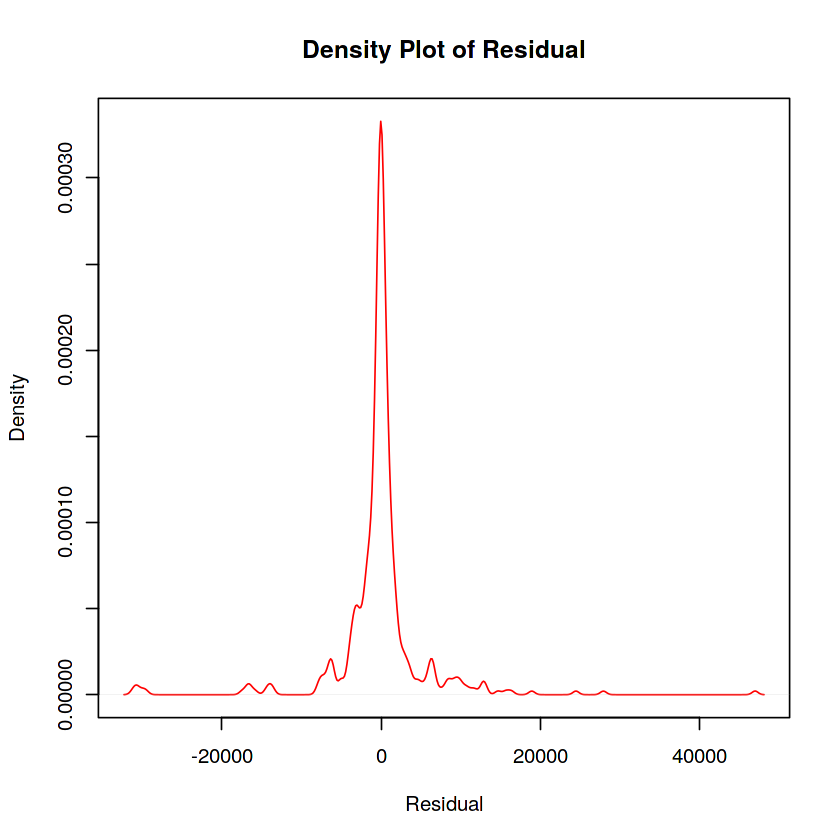

In [6]:
plot(density(data$TOTCHG - TOTCHG_prediction),col = 'red',
    xlab = 'Residual',
    ylab = 'Density',
    main = 'Density Plot of Residual')

> We can see distribution of Residual is nearly normal, that means our model is doing good.

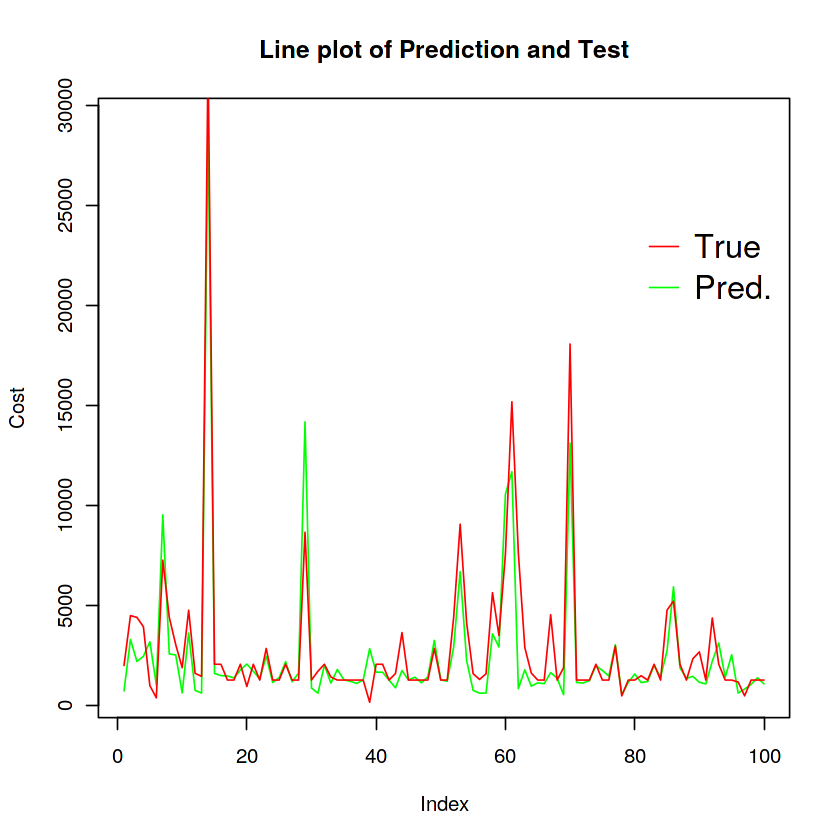

In [7]:
plot(test_data$TOTCHG,type='l',col='green',main = 'Line plot of Prediction and Test',
    xlab = 'Index',ylab = 'Cost')
lines(TOTCHG_prediction,type = 'l',col='red')

legend(80, 25000, legend=c("True", "Pred."),
       col=c("red", "green"), lty=1:1, cex=1.6,box.lty = 0)

> We can see how good our model is doing with test data!!

# Logistic Regression

Logistic regression is another technique borrowed by machine learning from the field of statistics.

It is the go-to method for binary classification problems (problems with two class values).

The logistic function, also called the sigmoid function was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

![](https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png)

## Problem Statement

Remiss is dependent variable, we have to predict probability of Remission using Logistic Regression!!

In [8]:
data=read.csv("../input/cancer-remission/Remission.csv")
set.seed(200)
head(data)

,Remiss,Cell,Smear,Infil,Li,Blast,Temp
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1,-8,-83,-66,1.9,1.100,-996
2,1,-9,-36,-32,1.4,-74.000,-992
3,0,-8,-88,-7,-8.0,-176.000,-982
4,0,1,-87,-87,-7.0,1.053,-986
5,1,-9,-75,-68,1.3,-519.000,-98
6,0,1,-65,-65,-6.0,-519.000,-982


## Data Splitting

In [9]:
train_obs <- floor (0.8*nrow (data))
train_ind<-sample(seq_len(nrow(data)),size=train_obs)
test = -train_ind

train_data<-data[train_ind,]
test_data<-data[-train_ind,]
testing_high <- data$Remiss[test]

## Model Building

In [10]:
regmod<-glm(Remiss~.,data = train_data,family=binomial())
summary(regmod)


Call:
glm(formula = Remiss ~ ., family = binomial(), data = train_data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.28718  -0.59603  -0.06141   0.50818   2.02014  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -7.581259   6.814658  -1.112    0.266
Cell         0.034501   0.024899   1.386    0.166
Smear        0.017240   0.153690   0.112    0.911
Infil       -0.114398   0.139973  -0.817    0.414
Li           0.523774   0.336609   1.556    0.120
Blast       -0.006348   0.005820  -1.091    0.275
Temp        -0.001145   0.002350  -0.487    0.626

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 26.734  on 20  degrees of freedom
Residual deviance: 15.965  on 14  degrees of freedom
AIC: 29.965

Number of Fisher Scoring iterations: 7


## Prediction and Evaluation

In [11]:
prob<- predict(regmod, test_data,type="response")
prob1<- data.frame(prob)

In [12]:
result=ifelse(prob>0.5,1,0)

library(caret)
confusionMatrix(as.factor(test_data$Remiss),
                   as.factor(result),positive = '1')

Loading required package: lattice

Loading required package: ggplot2


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress




Confusion Matrix and Statistics

          Reference
Prediction 0 1
         0 4 0
         1 1 1
                                          
               Accuracy : 0.8333          
                 95% CI : (0.3588, 0.9958)
    No Information Rate : 0.8333          
    P-Value [Acc > NIR] : 0.7368          
                                          
                  Kappa : 0.5714          
                                          
 Mcnemar's Test P-Value : 1.0000          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.8000          
         Pos Pred Value : 0.5000          
         Neg Pred Value : 1.0000          
             Prevalence : 0.1667          
         Detection Rate : 0.1667          
   Detection Prevalence : 0.3333          
      Balanced Accuracy : 0.9000          
                                          
       'Positive' Class : 1               
                                          

> Model is not doing good at predecting 1, 95% CI is large that shows result is more uncertain. Sensitivity is actually true positive rate which is only 50%. Summary of model is showing that there is no variable enough significant to explain Remission.

# Support Vector Classifier

“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well (look at the below snapshot).

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_1.png)

In [13]:
data1=read.csv("../input/healthcare-dataset/wisc_bc_data.csv",sep = ",",header = TRUE)
data=data1[,-c(1)]
data$diagnosis=factor(data$diagnosis,
                      levels = c("M","B"),
                      labels = c(1,0))
head(data)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


## Data Splitting

In [14]:
library(caTools)
set.seed(123)
sample=sample.split(data$diagnosis,SplitRatio = 0.80)
train_set=subset(data,sample==TRUE)
test_set=subset(data,sample==FALSE)

## Model Building

In [15]:
library(e1071)
model=svm(diagnosis~.,train_set,
         type = 'C-classification',
         kernel = 'linear')

In [16]:
summary(model)


Call:
svm(formula = diagnosis ~ ., data = train_set, type = "C-classification", 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  31

 ( 15 16 )


Number of Classes:  2 

Levels: 
 1 0




## Model Evaluation and Prediction

In [17]:
pred=predict(model,test_set)

In [18]:
library(caret)
confusionMatrix(as.factor(test_set$diagnosis),as.factor(pred))

Confusion Matrix and Statistics

          Reference
Prediction  1  0
         1 40  2
         0  1 70
                                          
               Accuracy : 0.9735          
                 95% CI : (0.9244, 0.9945)
    No Information Rate : 0.6372          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9429          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9756          
            Specificity : 0.9722          
         Pos Pred Value : 0.9524          
         Neg Pred Value : 0.9859          
             Prevalence : 0.3628          
         Detection Rate : 0.3540          
   Detection Prevalence : 0.3717          
      Balanced Accuracy : 0.9739          
                                          
       'Positive' Class : 1               
                                    

> Just see how well our model is able to learn the things :) Everything is Perfect!!

# CART : Decision Tree

Classification And Regression Trees : Classification and Regression Trees or CART for short is a term introduced by Leo Breiman to refer to Decision Tree algorithms that can be used for classification or regression predictive modeling problems.

Classically, this algorithm is referred to as “decision trees”, but on some platforms like R they are referred to by the more modern term CART.

The CART algorithm provides a foundation for important algorithms like bagged decision trees, random forest and boosted decision trees.

The representation for the CART model is a binary tree.

This is your binary tree from algorithms and data structures, nothing too fancy. Each root node represents a single input variable (x) and a split point on that variable (assuming the variable is numeric).

The leaf nodes of the tree contain an output variable (y) which is used to make a prediction.

![](https://miro.medium.com/max/1430/1*rSQIIAboJftqAv_BReNipg.png)

In [19]:
data1=read.csv("../input/healthcare-dataset/wisc_bc_data.csv",sep = ",",header = TRUE)
data=data1[,-c(1)]
data$diagnosis=factor(data$diagnosis,
                      levels = c("M","B"),
                      labels = c(1,0))
head(data)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


## Train Test Split

In [20]:
set.seed(123)
sample=sample.split(data$diagnosis,SplitRatio = 0.80)
train_set=subset(data,sample==TRUE)
test_set=subset(data,sample==FALSE)

## Model Building

In [21]:
library(rpart)
model=rpart(diagnosis~.,train_set)

## Plot the Model

Rattle: A free graphical interface for data science with R.
Version 5.3.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



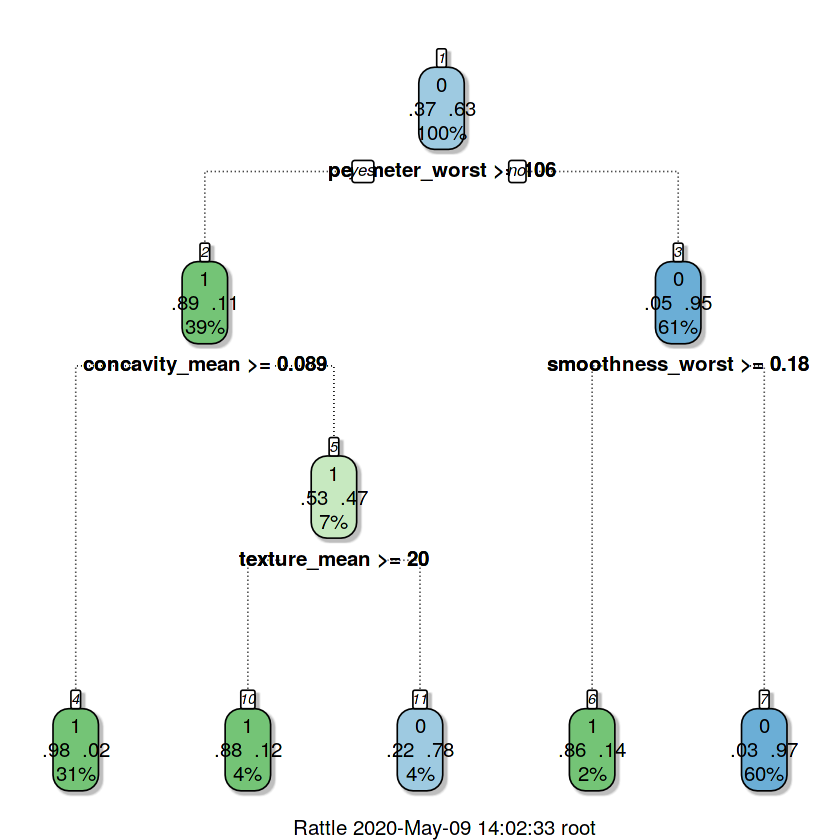

In [22]:
library(rattle)
library(rpart.plot)

fancyRpartPlot(model)

## Evaluation and Prediction

In [23]:
pred=predict(model,test_set,type = "class")

confusionMatrix(as.factor(test_set$diagnosis),as.factor(pred))

Confusion Matrix and Statistics

          Reference
Prediction  1  0
         1 36  6
         0  7 64
                                          
               Accuracy : 0.885           
                 95% CI : (0.8113, 0.9373)
    No Information Rate : 0.6195          
    P-Value [Acc > NIR] : 2.697e-10       
                                          
                  Kappa : 0.7549          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8372          
            Specificity : 0.9143          
         Pos Pred Value : 0.8571          
         Neg Pred Value : 0.9014          
             Prevalence : 0.3805          
         Detection Rate : 0.3186          
   Detection Prevalence : 0.3717          
      Balanced Accuracy : 0.8757          
                                          
       'Positive' Class : 1               
                                    

> Model is doing good, But we can see SVC was far better than this :)

# KNN

KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry. To evaluate any technique we generally look at 3 important aspects:

1. Ease to interpret output

2. Calculation time

3. Predictive Power

![](https://miro.medium.com/max/800/1*2zYNhLc522h0zftD1zDh2g.png)

In [24]:
data1=read.csv("../input/healthcare-dataset/wisc_bc_data.csv",sep = ",",header = TRUE)
data=data1[,-c(1)]
data$diagnosis=factor(data$diagnosis,
                      levels = c("M","B"),
                      labels = c(1,0))

normalize<-function(x){
  return ((x-min(x)) / (max(x)-min(x)))
}


data=as.data.frame(lapply(data1[3:31], normalize))
head(data)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,fractal_dimension_mean,⋯,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.5210374,0.0226581,0.5459885,0.3637328,0.5937528,0.7920373,0.7031396,0.7311133,0.6863636,0.6055181,⋯,0.1830424,0.6207755,0.1415245,0.6683102,0.45069799,0.6011358,0.6192916,0.5686102,0.9120275,0.5984624
2,0.6431445,0.2725736,0.6157833,0.5015907,0.2898799,0.1817680,0.2036082,0.3487575,0.3797980,0.1413227,⋯,0.0911101,0.6069015,0.3035714,0.5398177,0.43521431,0.3475533,0.1545634,0.1929712,0.6391753,0.2335896
3,0.6014956,0.3902604,0.5957432,0.4494168,0.5143089,0.4310165,0.4625117,0.6356859,0.5095960,0.2112468,⋯,0.1270055,0.5563856,0.3600746,0.5084417,0.37450845,0.4835898,0.3853751,0.3597444,0.8350515,0.4037059
4,0.2100904,0.3608387,0.2335015,0.1029056,0.8113208,0.8113613,0.5656045,0.5228628,0.7762626,1.0000000,⋯,0.2872048,0.2483102,0.3859275,0.2413467,0.09400806,0.9154725,0.8140117,0.5486422,0.8848797,1.0000000
5,0.6298926,0.1565776,0.6309861,0.4892895,0.4303512,0.3478928,0.4639175,0.5183897,0.3782828,0.1868155,⋯,0.1457996,0.5197439,0.1239339,0.5069476,0.34157491,0.4373638,0.1724151,0.3194888,0.5584192,0.1575005
6,0.2588386,0.2025702,0.2679842,0.1415058,0.6786133,0.4619962,0.3697282,0.4020378,0.5186869,0.5511794,⋯,0.1446596,0.2682319,0.3126333,0.2639076,0.13674794,0.7127386,0.4827837,0.4277157,0.5982818,0.4770353


## Train Test Split

In [25]:
wbcd_train=data[1:469,]
wbcd_test=data[470:569,]

wbcd_train_labels=data1[1:469,2]
wbcd_test_labels=data1[470:569,2]

## Model Building & Evaluation

In [26]:
library(class)
wbcd_test_pred=knn(train = wbcd_train,test = wbcd_test,
                   cl=wbcd_train_labels,k=21)

In [27]:
confusionMatrix(as.factor(wbcd_test_labels),as.factor(wbcd_test_pred))

Confusion Matrix and Statistics

          Reference
Prediction  B  M
         B 77  0
         M  2 21
                                          
               Accuracy : 0.98            
                 95% CI : (0.9296, 0.9976)
    No Information Rate : 0.79            
    P-Value [Acc > NIR] : 2.185e-08       
                                          
                  Kappa : 0.9418          
                                          
 Mcnemar's Test P-Value : 0.4795          
                                          
            Sensitivity : 0.9747          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9130          
             Prevalence : 0.7900          
         Detection Rate : 0.7700          
   Detection Prevalence : 0.7700          
      Balanced Accuracy : 0.9873          
                                          
       'Positive' Class : B               
                                    

> We can clearly see KNN is doing even better than SVC!!

# Naive Bayes

I will make a SMS Filter using Naive Bayes!!

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

![](https://uc-r.github.io/public/images/analytics/naive_bayes/naive_bayes_icon.png)

In [28]:
sms_raw=read.csv("../input/healthcare-dataset/sms_spam.csv",stringsAsFactors = FALSE)
sms_raw$type=as.factor(sms_raw$type)

In [29]:
library(tm)

#CREATING CORPUS

sms_corpus=VCorpus(VectorSource(sms_raw$text))

Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate


The following object is masked from ‘package:httr’:

    content




In [30]:
lapply(sms_corpus[1:3], as.character)

$`1`
[1] "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."

$`2`
[1] "Ok lar... Joking wif u oni..."

$`3`
[1] "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

## Text Cleaning

In [31]:
#tRANSFORMING ALL THE SMS IN TO LOWER LETTER

sms_corpus_clean=tm_map(sms_corpus,content_transformer(tolower))

In [32]:
#removing Numbers
sms_corpus_clean=tm_map(sms_corpus_clean,removeNumbers)

In [33]:
#removing StopWords
sms_corpus_clean=tm_map(sms_corpus_clean,removeWords,stopwords())

In [34]:
#removing Punctuation
sms_corpus_clean=tm_map(sms_corpus_clean,removePunctuation)

In [35]:
#Stemming
library(SnowballC)
sms_corpus_clean=tm_map(sms_corpus_clean,
                        stemDocument)

In [36]:
#Removing Extra WhiteSpace
sms_corpus_clean=tm_map(sms_corpus_clean,
                        stripWhitespace)

In [37]:
#Document Term Matrix(Tokenization)
sms_dtm=DocumentTermMatrix(sms_corpus_clean)
sms_dtm

<<DocumentTermMatrix (documents: 5574, terms: 6592)>>
Non-/sparse entries: 42608/36701200
Sparsity           : 100%
Maximal term length: 40
Weighting          : term frequency (tf)

## Train Test Split

In [38]:
sms_dtm_train=sms_dtm[1:4174,]
sms_dtm_test=sms_dtm[4175:5574,]

sms_train_labels=sms_raw[1:4174,]$type
sms_test_labels=sms_raw[4175:5574,]$type

In [39]:
prop.table(table(sms_train_labels))
prop.table(table(sms_test_labels))

sms_train_labels
      ham      spam 
0.8646382 0.1353618 

sms_test_labels
 ham spam 
0.87 0.13 

Loading required package: RColorBrewer



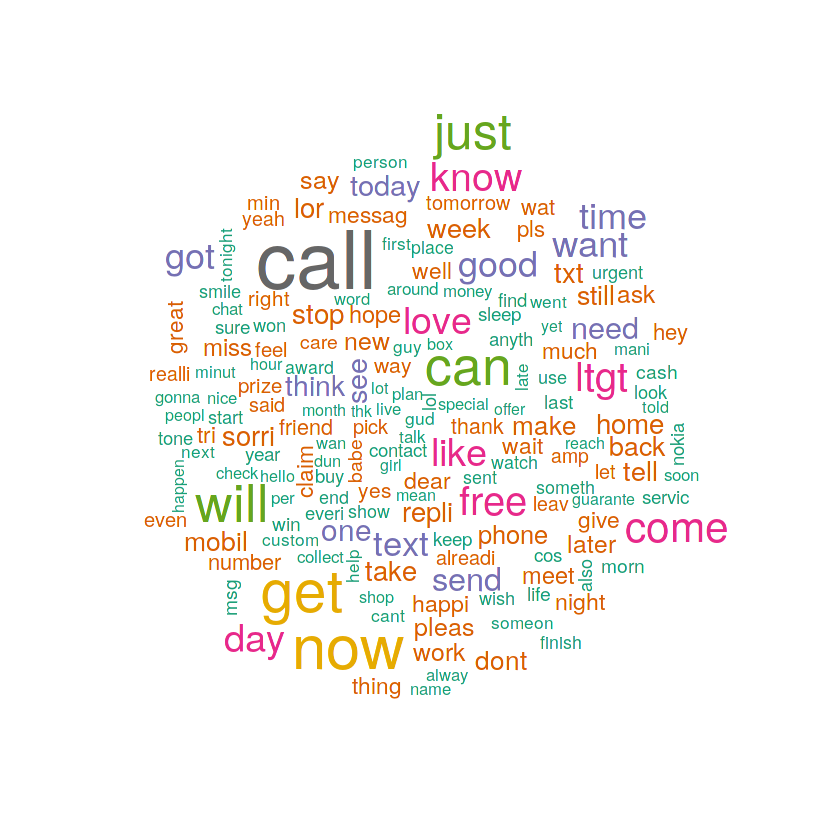

In [40]:
library(wordcloud)
wordcloud(sms_corpus_clean,min.freq = 50,
          random.order = TRUE,
          colors = brewer.pal(8,"Dark2"))

> We can see top occuring words :)

Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
“transformation drops documents”


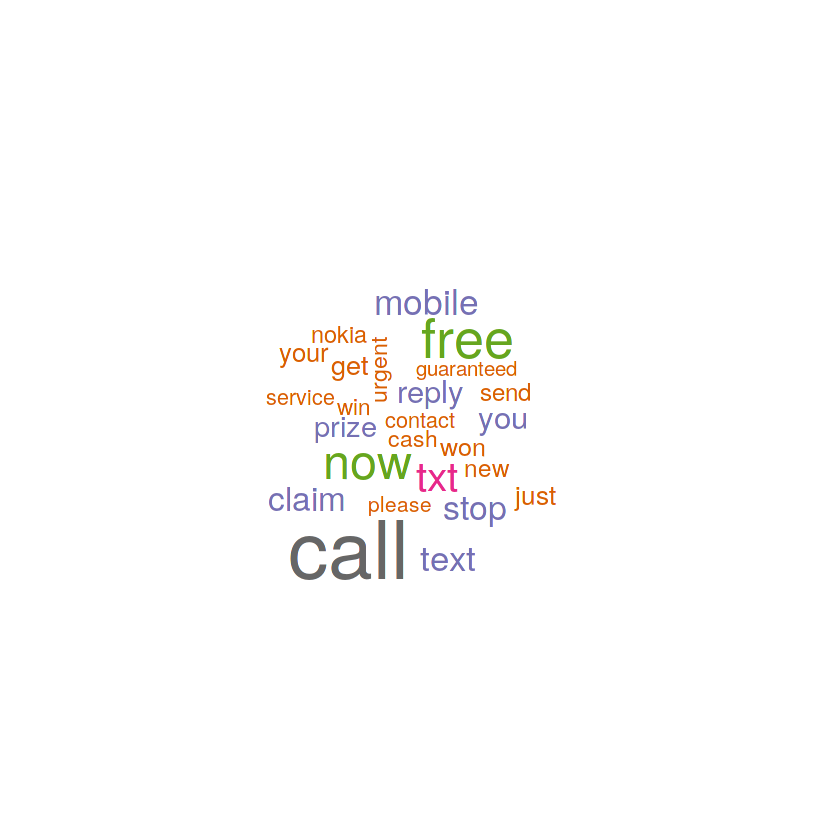

In [41]:
spam=subset(sms_raw,type=="spam")
ham=subset(sms_raw,type=="ham")

wordcloud(spam$text,min.freq = 50,random.order = TRUE,
          colors = brewer.pal(8,"Dark2"))

> We can see SPAM messages are mostly containing words like call, free etc.

Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
“transformation drops documents”


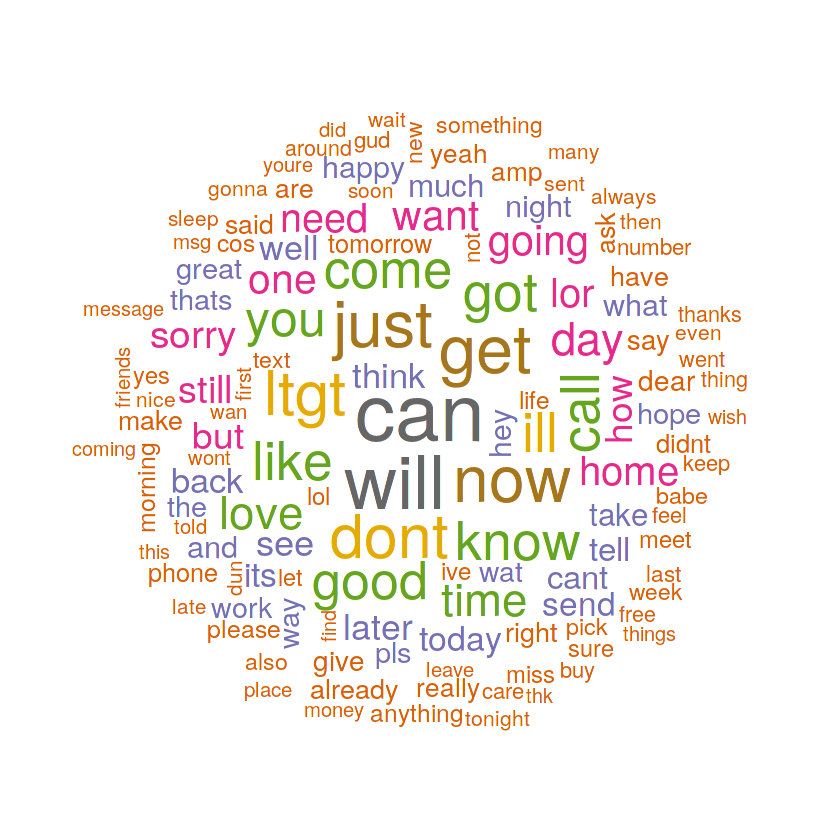

In [42]:
wordcloud(ham$text,min.freq = 50,random.order = FALSE,colors = brewer.pal(8,"Dark2"))

> We can see top occuring words in Ham Messages!!

In [43]:
sms_freq_words=findFreqTerms(sms_dtm_train,5)
sms_dtm_freq_train=sms_dtm_train[,sms_freq_words]
sms_dtm_freq_test=sms_dtm_test[,sms_freq_words]

convert_counts=function(x){
  x=ifelse(x>0,"Yes","No")
}

sms_train=apply(sms_dtm_freq_train,2,convert_counts)
sms_test=apply(sms_dtm_freq_test, 2, convert_counts)

## SMS Filter Model

In [44]:
library(e1071)
sms_classifier=naiveBayes(sms_train,sms_train_labels)
sms_classifier


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = sms_train, y = sms_train_labels)

A-priori probabilities:
sms_train_labels
      ham      spam 
0.8646382 0.1353618 

Conditional probabilities:
                £wk
sms_train_labels          No         Yes
            ham  1.000000000 0.000000000
            spam 0.991150442 0.008849558

                abiola
sms_train_labels          No         Yes
            ham  0.996952064 0.003047936
            spam 1.000000000 0.000000000

                abl
sms_train_labels          No         Yes
            ham  0.995012469 0.004987531
            spam 1.000000000 0.000000000

                abt
sms_train_labels          No         Yes
            ham  0.994458299 0.005541701
            spam 1.000000000 0.000000000

                accept
sms_train_labels         No        Yes
            ham  0.99833749 0.00166251
            spam 1.00000000 0.00000000

                access
sms_train_labels           No     

## Evaluation and Prediction

In [45]:
sms_test_pred=predict(sms_classifier,sms_test)

In [46]:
confusionMatrix(sms_test_pred,sms_test_labels,positive = "spam")

Confusion Matrix and Statistics

          Reference
Prediction  ham spam
      ham  1209   20
      spam    9  162
                                          
               Accuracy : 0.9793          
                 95% CI : (0.9704, 0.9861)
    No Information Rate : 0.87            
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.906           
                                          
 Mcnemar's Test P-Value : 0.06332         
                                          
            Sensitivity : 0.8901          
            Specificity : 0.9926          
         Pos Pred Value : 0.9474          
         Neg Pred Value : 0.9837          
             Prevalence : 0.1300          
         Detection Rate : 0.1157          
   Detection Prevalence : 0.1221          
      Balanced Accuracy : 0.9414          
                                          
       'Positive' Class : spam            
                        

> We can see our classifier is doing really good in finding SPAM Messgaes!!!

# ANN

![](https://www.researchgate.net/publication/333086320/figure/fig1/AS:758459607826451@1557842270848/Artificial-neural-network-model-Fig-2-Artificial-neural-network-model-for.jpg)

Artificial neural networks are one of the main tools used in machine learning. As the “neural” part of their name suggests, they are brain-inspired systems which are intended to replicate the way that we humans learn. Neural networks consist of input and output layers, as well as (in most cases) a hidden layer consisting of units that transform the input into something that the output layer can use. They are excellent tools for finding patterns which are far too complex or numerous for a human programmer to extract and teach the machine to recognize.

In [47]:
concrete=read.csv("../input/healthcare-dataset/concrete.csv")

normalize=function(x){
  return((x-min(x))/(max(x)-min(x)))
}

concrete_norm=as.data.frame(lapply(concrete, normalize))

head(concrete_norm)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.0000000,0.0000000,0,0.3210863,0.07763975,0.6947674,0.2057200,0.07417582,0.9674847
2,1.0000000,0.0000000,0,0.3210863,0.07763975,0.7383721,0.2057200,0.07417582,0.7419958
3,0.5262557,0.3964942,0,0.8482428,0.00000000,0.3808140,0.0000000,0.73901099,0.4726548
4,0.5262557,0.3964942,0,0.8482428,0.00000000,0.3808140,0.0000000,1.00000000,0.4823720
5,0.2205479,0.3683918,0,0.5607029,0.00000000,0.5156977,0.5807827,0.98626374,0.5228603
6,0.3744292,0.3171953,0,0.8482428,0.00000000,0.3808140,0.1906673,0.24450549,0.5568706


## Train Test Split

In [48]:
set.seed(12345)
concrete_train=concrete_norm[1:773,]
concrete_test=concrete_norm[773:1030,]

## Training NN

In [49]:
library(neuralnet)

model=neuralnet(strength~.,concrete_train,hidden = c(4))

## Plot Model

In [50]:
plot(model)

In [51]:
model_result=compute(model,concrete_test[1:8])
pred=model_result$net.result

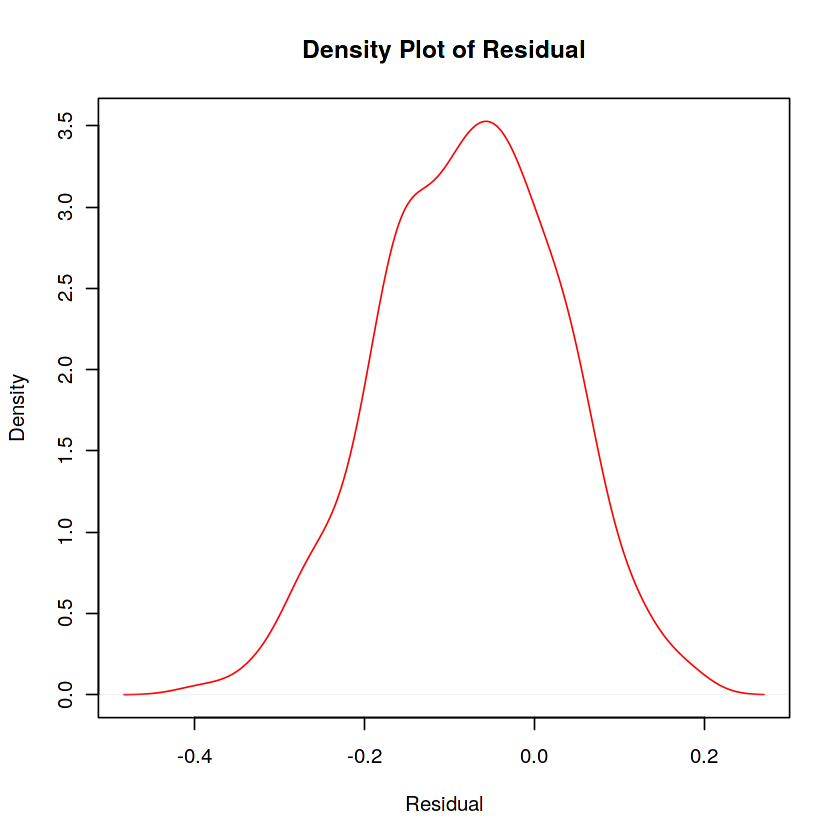

In [52]:
plot(density(concrete_test$strength - pred),col = 'red',
    xlab = 'Residual',
    ylab = 'Density',
    main = 'Density Plot of Residual')

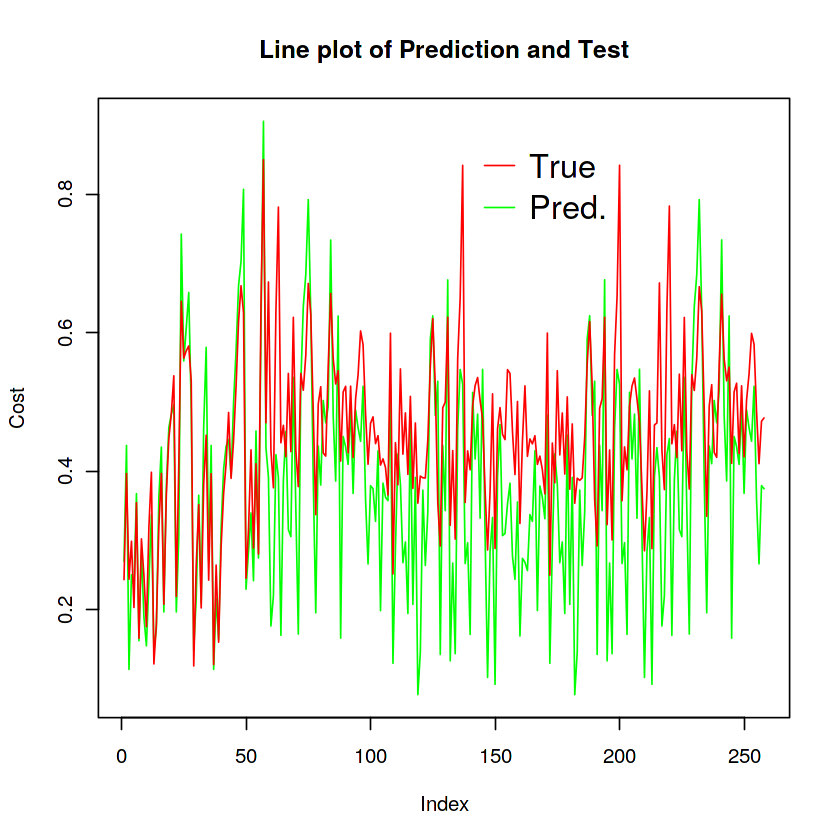

In [53]:
plot(concrete_test$strength,type='l',col='green',main = 'Line plot of Prediction and Test',
    xlab = 'Index',ylab = 'Cost')
lines(pred,type = 'l',col='red')

legend(140, 0.9, legend=c("True", "Pred."),
       col=c("red", "green"), lty=1:1, cex=1.6,box.lty = 0)

> We can see distribution of error are normal and prediction are also not that bad. But In mid it is deviating a bit. You may try a more complex nn at your own!!

# KMeans Clustering

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.
Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes.

![](https://miro.medium.com/max/12094/1*IXGsBrC9FnSHGJVw9lDhQA.png)

In [54]:
data1=read.csv("../input/healthcare-dataset/cluster data.csv")
data=data1[,c(2,5)]
head(data)

,Age,Income
,<int>,<int>
1,26,28000
2,27,29500
3,28,31000
4,30,32500
5,32,34000
6,35,35500


## Elbow Plot

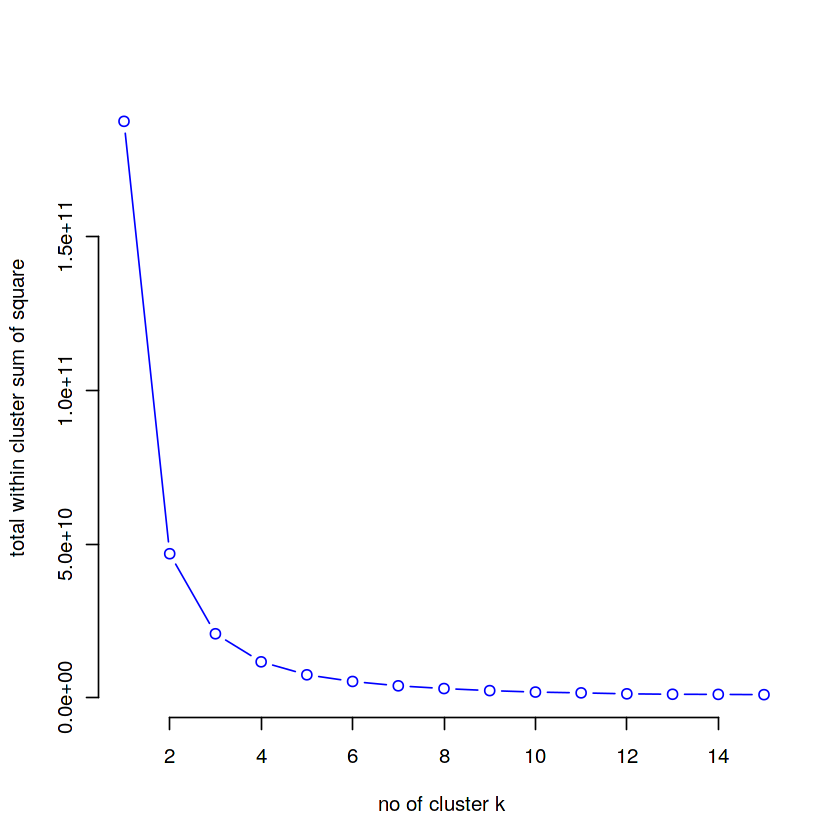

In [55]:
k.max <- 15 

wss <- sapply(1:k.max,function(k) {kmeans(data,
                                          k)$tot.withinss})
plot (1:k.max,wss,type = "b",frame = FALSE,
      xlab = "no of cluster k ",
      ylab = "total within cluster sum of square",col='blue')

## Model Training

In [56]:
k <- kmeans(data,3)

In [60]:
#library(animation)
#kmeans.ani(data,3)

> You can plot clusters, I am not sure why package is not working for R 3.6

In [62]:
k$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

> Here we have cluster centers for data points !!

# APRIORI

Apriori is an algorithm for frequent item set mining and association rule learning over relational databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database. The frequent item sets determined by Apriori can be used to determine association rules which highlight general trends in the database: this has applications in domains such as market basket analysis.

![](https://miro.medium.com/max/5760/1*DHfQvlMVBaJCHpYmj1kmCw.png)

In [64]:
library(arules)
data=read.transactions("../input/healthcare-dataset/groceries.csv",sep=",")
summary(data)

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
            labels
1 abrasive cleaner
2 artif. sweetener
3   baby cosmetics

In [65]:
inspect(data[1:2])

    items                
[1] {citrus fruit,       
     margarine,          
     ready soups,        
     semi-finished bread}
[2] {coffee,             
     tropical fruit,     
     yogurt}             


In [66]:
rules=apriori(data,
              parameter = list(support=0.001,
                               confidence=0.8,
                               minlen=2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      2
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.02s].
writing ... [410 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [67]:
inspect(head(sort(rules,by="lift")[1:3]))

    lhs                        rhs                   support confidence     lift count
[1] {liquor,                                                                          
     red/blush wine}        => {bottled beer}    0.001931876  0.9047619 11.23527    19
[2] {citrus fruit,                                                                    
     fruit/vegetable juice,                                                           
     other vegetables,                                                                
     soda}                  => {root vegetables} 0.001016777  0.9090909  8.34040    10
[3] {oil,                                                                             
     other vegetables,                                                                
     tropical fruit,                                                                  
     whole milk,                                                                      
     yogurt}                => {root vegeta

> We can see the combination of items that should be kept together :)

### Thank you for reading my Kernel :) I hope you enjoyed it!! Please do up vote if you like it.....